In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_excel("./data/orders_orders.xlsx")



In [9]:
df.head()

,Category,City,Country,Customer ID,Customer Name,Market,Order Date,Order ID,Order Priority,Product ID,...,Ship Date,Ship Mode,State,Sub-Category,Discount,Número de registros,Profit,Quantity,Sales,Shipping Cost
0,Office Supplies,Constantine,Algeria,TB-112801,Toby Braunhardt,EMEA,2011-01-01,AG-2011-2040,Medium,OFF-TEN-10000025,...,2011-01-06,Standard Class,Constantine,Storage,0.0,1,106.14,2,408.30,35.46
1,Office Supplies,Dar es Salaam,Tanzania,JG-51151,Jack Garza,EMEA,2011-01-03,TZ-2011-7370,Medium,OFF-STI-10000388,...,2011-01-08,Standard Class,Dar Es Salaam,Supplies,0.0,1,26.76,4,81.24,5.11
2,Office Supplies,Khartoum,Sudan,JC-53401,Jasper Cacioppo,EMEA,2011-01-04,SU-2011-5190,Medium,OFF-BOS-10004950,...,2011-01-08,Standard Class,Khartoum,Art,0.0,1,2.61,1,15.48,0.82
3,Office Supplies,Khartoum,Sudan,JC-53401,Jasper Cacioppo,EMEA,2011-01-04,SU-2011-5190,Medium,OFF-AVE-10003279,...,2011-01-08,Standard Class,Khartoum,Binders,0.0,1,2.10,1,5.91,0.51
4,Technology,Luanda,Angola,GK-46201,Grace Kelly,EMEA,2011-01-06,AO-2011-4910,Medium,TEC-LOG-10003079,...,2011-01-11,Standard Class,Luanda,Accessories,0.0,1,12.72,1,28.32,2.00


Ponemos la fecha como indice. Se trata de la fecha de la order

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

Vemos que horquilla de fechas coge el dataset

In [13]:
print('Fecha mínima:', df.index.min(), '\nFecha máxima:', df.index.max())

Fecha mínima: 2011-01-01 00:00:00 
Fecha máxima: 2014-12-31 00:00:00


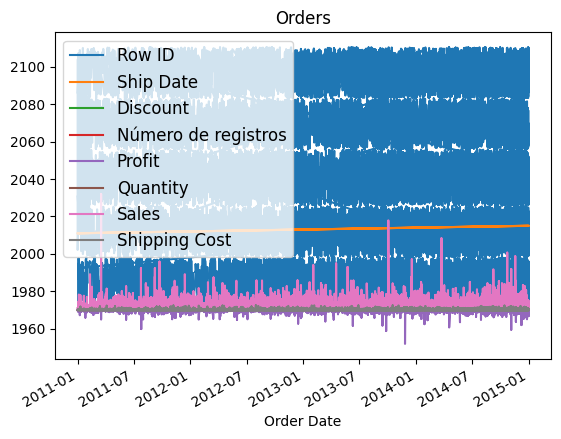

In [20]:
df.plot()
plt.legend(loc='best', fontsize=12)
plt.title('Orders');

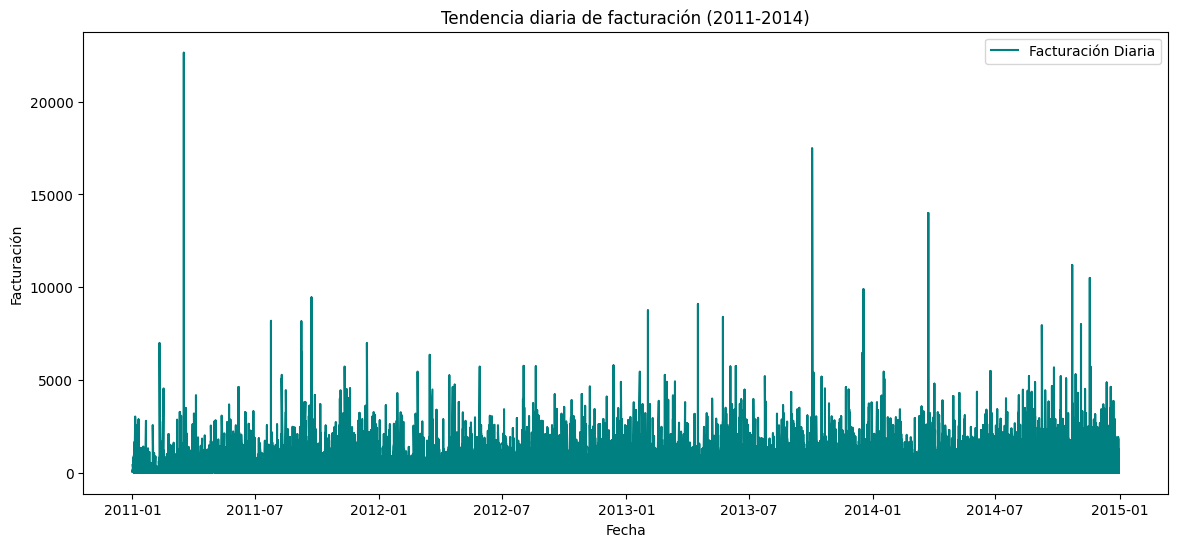

In [25]:

# Convertir la columna de fecha en formato datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Gráfico de tendencia de facturación diaria
plt.figure(figsize=(14, 6))
plt.plot(df['Order Date'], df['Sales'], label='Facturación Diaria', color='teal')
plt.title('Tendencia diaria de facturación (2011-2014)')
plt.xlabel('Fecha')
plt.ylabel('Facturación')
plt.legend()
plt.show()


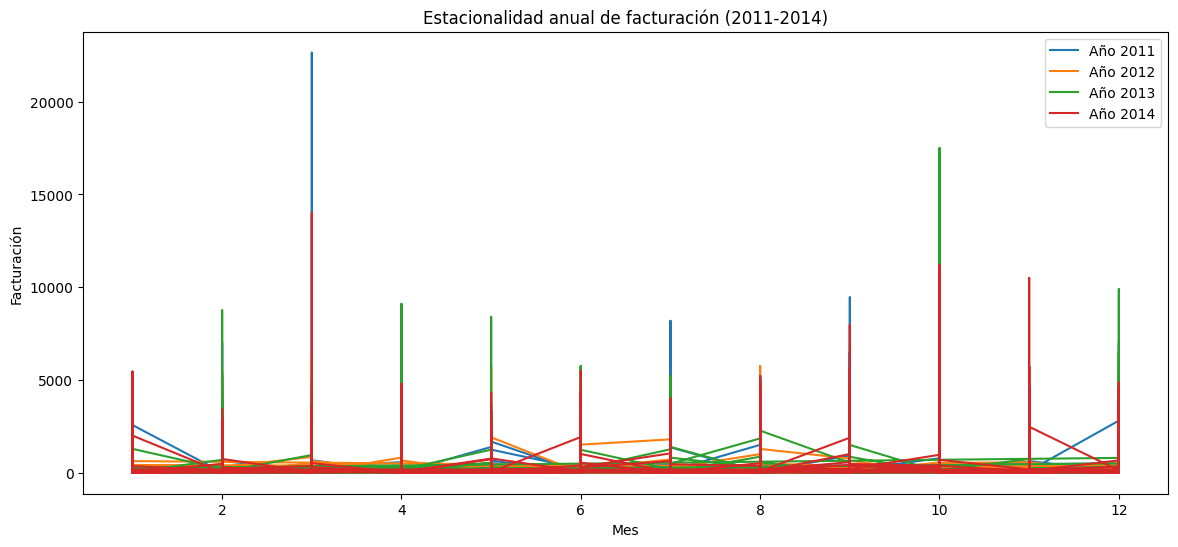

In [26]:
# Crear una columna de mes para identificar estacionalidad
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Graficar la facturación mensual con cada año por separado sin agregar datos
plt.figure(figsize=(14, 6))
for year in df['Year'].unique():
    yearly_data = df[df['Year'] == year]
    plt.plot(yearly_data['Order Date'].dt.month, yearly_data['Sales'], label=f'Año {year}')

plt.title('Estacionalidad anual de facturación (2011-2014)')
plt.xlabel('Mes')
plt.ylabel('Facturación')
plt.legend()
plt.show()


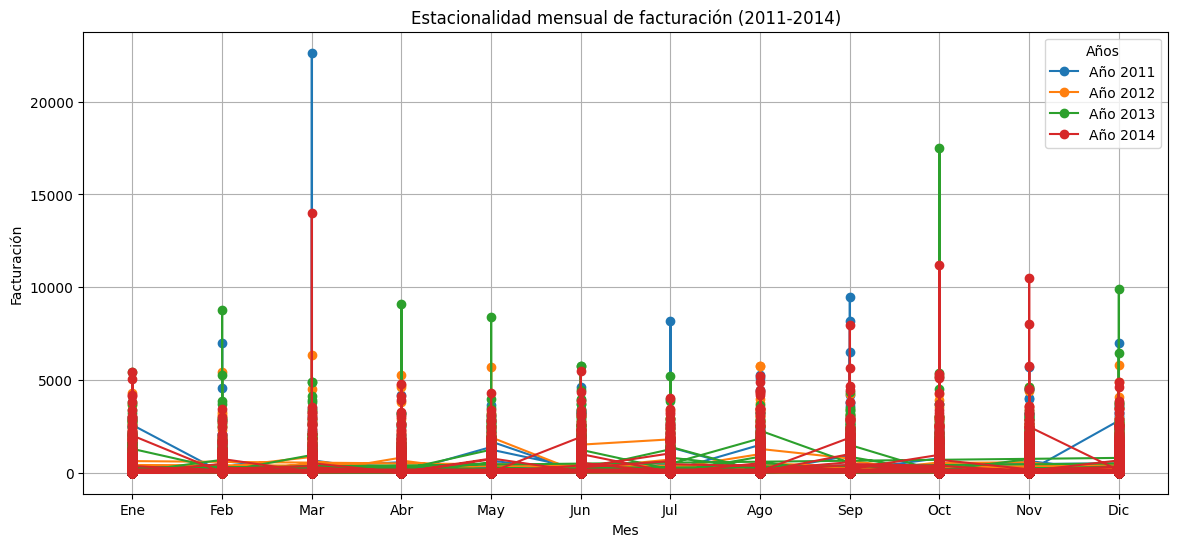

In [27]:
plt.figure(figsize=(14, 6))

# Trazar una línea para cada año, alineando todos en el mismo rango de meses
for year in df['Year'].unique():
    # Filtrar los datos de facturación para el año actual
    yearly_data = df[df['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Sales'], marker='o', label=f'Año {year}')

# Ajustes finales del gráfico
plt.title('Estacionalidad mensual de facturación (2011-2014)')
plt.xlabel('Mes')
plt.ylabel('Facturación')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title="Años")
plt.grid(True)
plt.show()

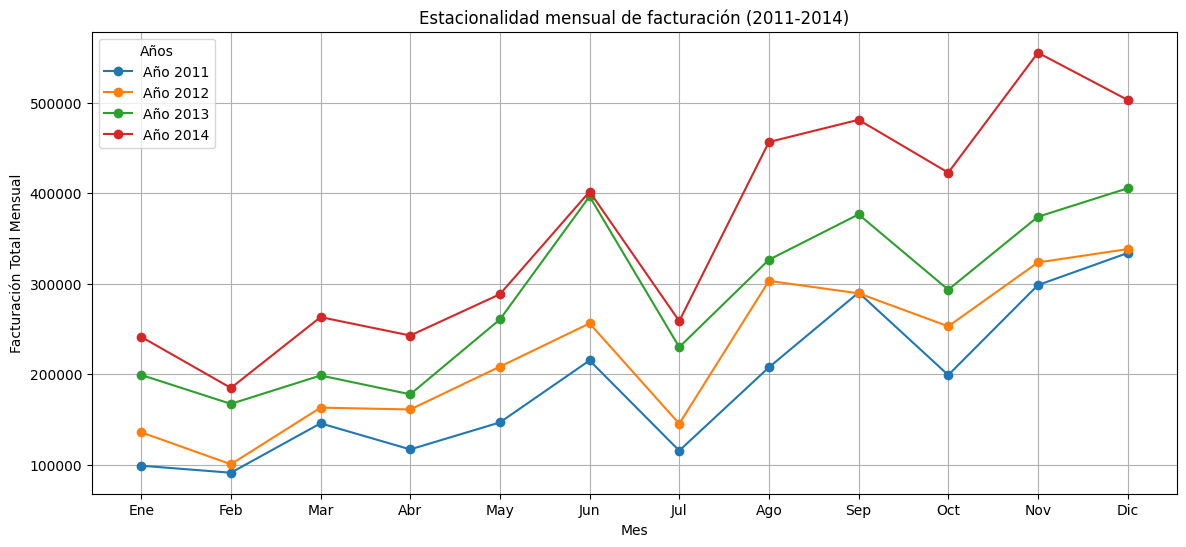

In [29]:

# Convertir la columna de fecha en formato datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extraer mes y año de cada fecha
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Agrupar por año y mes para obtener la suma mensual de ventas
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Graficar la facturación mensual con una línea por cada año
plt.figure(figsize=(14, 6))
for year in monthly_sales['Year'].unique():
    # Filtrar los datos de facturación para el año actual
    yearly_data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Sales'], marker='o', label=f'Año {year}')

# Ajustes finales del gráfico
plt.title('Estacionalidad mensual de facturación (2011-2014)')
plt.xlabel('Mes')
plt.ylabel('Facturación Total Mensual')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title="Años")
plt.grid(True)
plt.show()



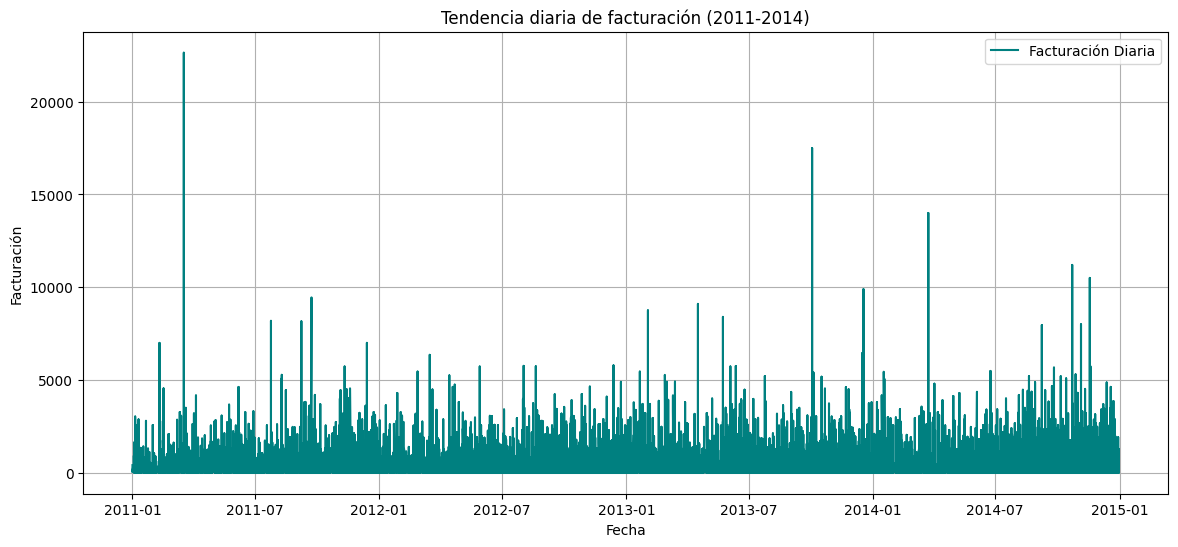

In [32]:


# Convertir la columna de fecha en formato datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Ordenar los datos por fecha para una correcta visualización en el gráfico
df = df.sort_values('Order Date')

# Graficar la facturación diaria como una línea continua
plt.figure(figsize=(14, 6))
plt.plot(df['Order Date'], df['Sales'], color='teal', label='Facturación Diaria')
plt.title('Tendencia diaria de facturación (2011-2014)')
plt.xlabel('Fecha')
plt.ylabel('Facturación')
plt.legend()
plt.grid(True)
plt.show()


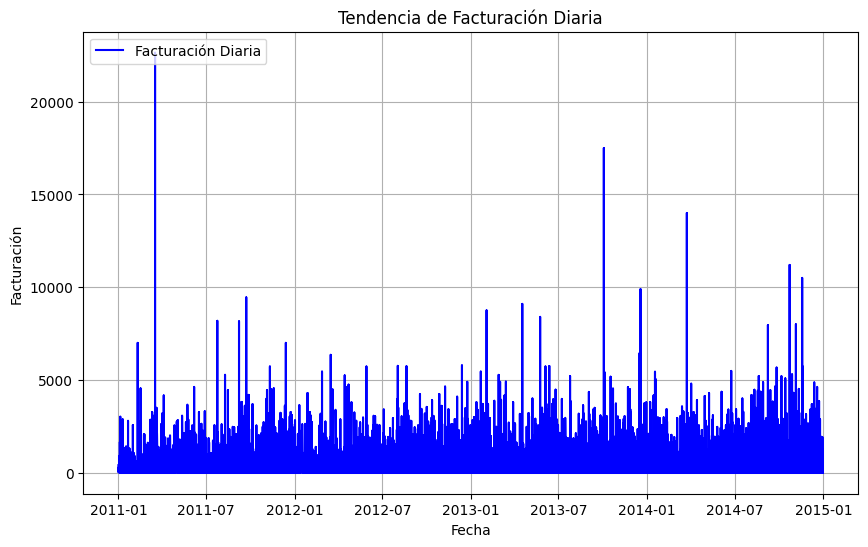

In [36]:
# Convertir la columna de fecha en formato datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Ordenar los datos por fecha
df = df.sort_values('Order Date')

# Crear el gráfico de tendencia similar al estilo de "Air Passengers"
plt.figure(figsize=(10, 6))
plt.plot(df['Order Date'], df['Sales'], color='blue', label='Facturación Diaria')
plt.title('Tendencia de Facturación Diaria')
plt.xlabel('Fecha')
plt.ylabel('Facturación')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

C:\Users\Guillem\AppData\Local\Temp\ipykernel_17672\4270638845.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum()


           shift_1   shift_2   shift_3   shift_4   shift_5   shift_6  \
shift_1   1.000000  0.499295  0.346270  0.387445 -0.201398 -0.093688   
shift_2   0.499295  1.000000  0.429951  0.172991  0.225177 -0.193897   
shift_3   0.346270  0.429951  1.000000  0.358437  0.056358  0.273969   
shift_4   0.387445  0.172991  0.358437  1.000000  0.207392  0.090482   
shift_5  -0.201398  0.225177  0.056358  0.207392  1.000000  0.226357   
shift_6  -0.093688 -0.193897  0.273969  0.090482  0.226357  1.000000   
shift_7   0.069805 -0.311875 -0.307048  0.150888 -0.069592  0.264804   
shift_8  -0.217684  0.045772 -0.312341 -0.358127  0.132847  0.001377   
shift_9  -0.132509 -0.211633  0.095487 -0.298608 -0.364078  0.218065   
shift_10  0.290802 -0.153734 -0.182000  0.105518 -0.332313 -0.234928   
shift_11  0.315943  0.399727 -0.055102 -0.098272  0.179824 -0.162973   
shift_12  0.511135  0.355969  0.437204 -0.039630 -0.101985  0.260462   
shift_13  0.907908  0.411373  0.257632  0.325962 -0.219127 -0.15

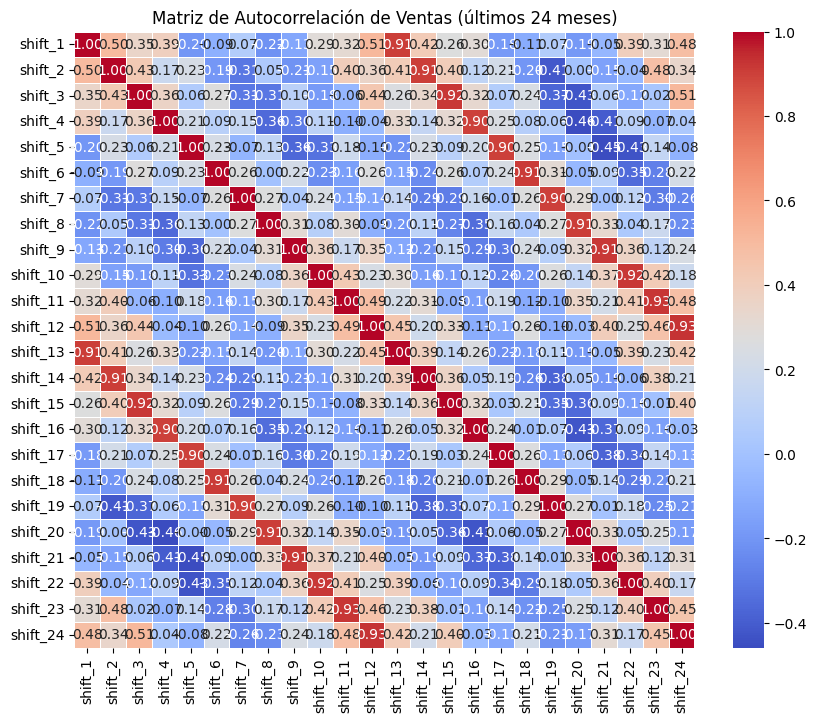

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df' es el DataFrame con tu conjunto de datos
# Primero convertimos la columna 'Order Date' a tipo datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Agrupar las ventas por mes (sumamos las ventas por cada mes)
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum()

# Crear el dataframe con desplazamientos de 1 a 24 meses
shifted_data = pd.DataFrame({f'shift_{i}': monthly_sales.shift(i) for i in range(1, 25)})

# Eliminar filas con valores nulos generados por los desplazamientos
shifted_data = shifted_data.dropna()

# Calcular la matriz de autocorrelación
correlation_matrix = shifted_data.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Autocorrelación de Ventas (últimos 24 meses)")
plt.show()



Probamos modelo y lo entrenamos

C:\Users\Guillem\AppData\Local\Temp\ipykernel_17672\2099055554.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum()


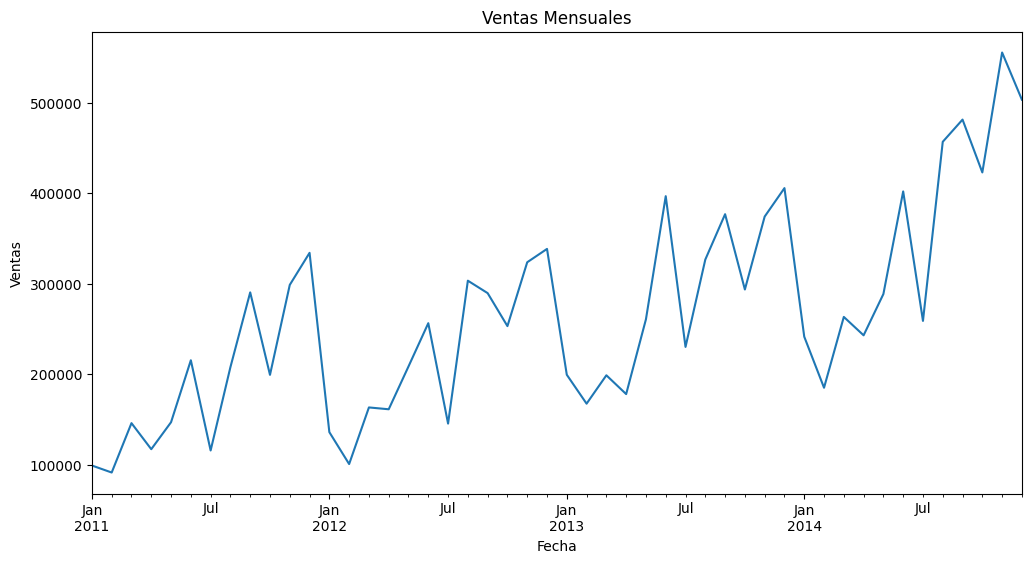

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que 'df' es el DataFrame con tus datos
# Asegurarnos de que 'Order Date' esté en formato datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Agrupar por mes
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum()

# Graficar la serie temporal
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title("Ventas Mensuales")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.show()

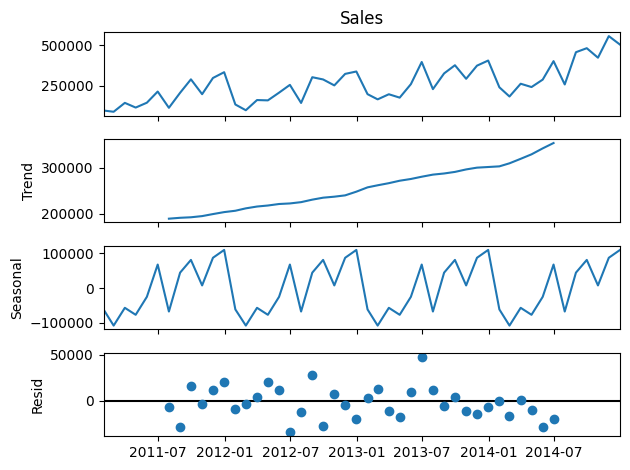

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer la serie temporal
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)

# Graficar la descomposición
decomposition.plot()
plt.show()


C:\Users\Guillem\AppData\Local\Temp\ipykernel_17672\1940563810.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum()


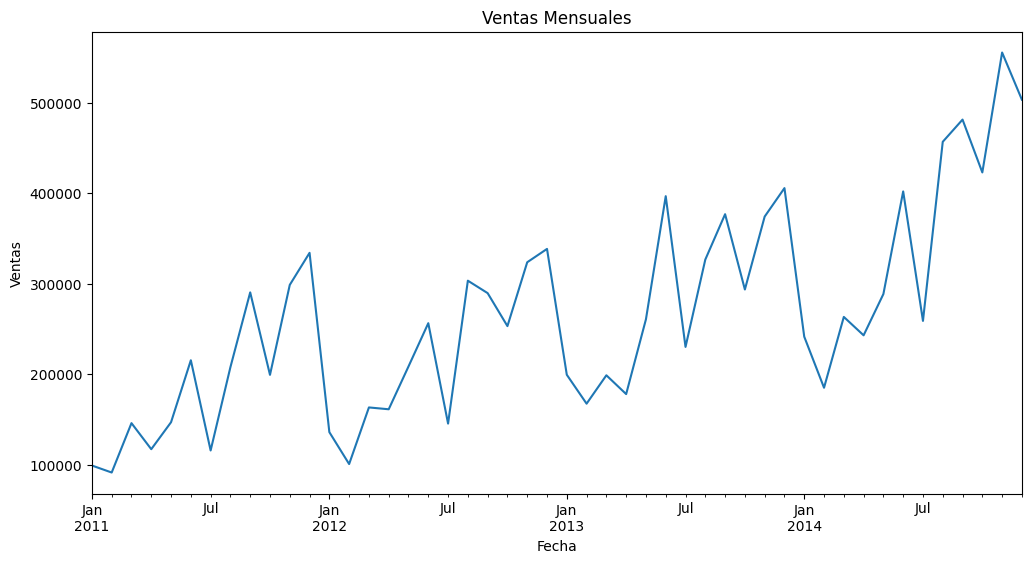

<Figure size 1200x600 with 0 Axes>

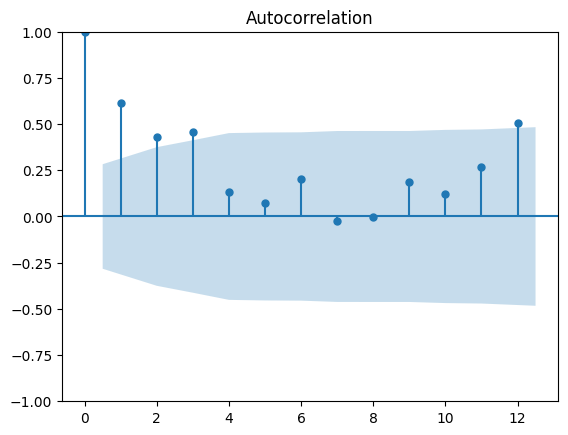

<Figure size 1200x600 with 0 Axes>

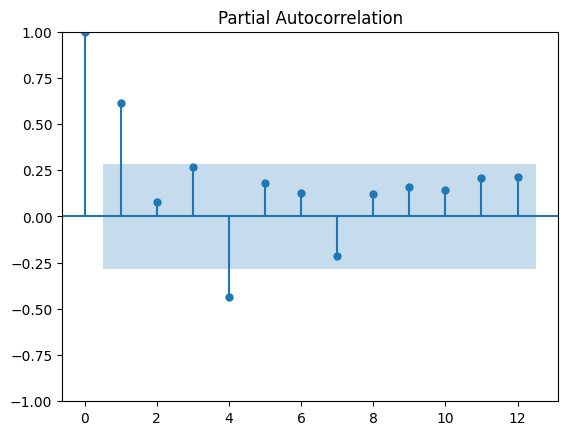

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -598.715
Date:                Thu, 14 Nov 2024   AIC                           1203.430
Time:                        19:15:41   BIC                           1208.980
Sample:                    01-31-2011   HQIC                          1205.518
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0148      0.341      0.044      0.965      -0.653       0.683
ma.L1         -0.4748      0.352     -1.349      0.177      -1.165       0.215
sigma2      7.753e+09   8.31e-12   9.32e+20      0.0

C:\Users\Guillem\AppData\Local\Temp\ipykernel_17672\1940563810.py:45: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=13, freq='M')[1:], forecast_arima, label='Predicción ARIMA', color='red')


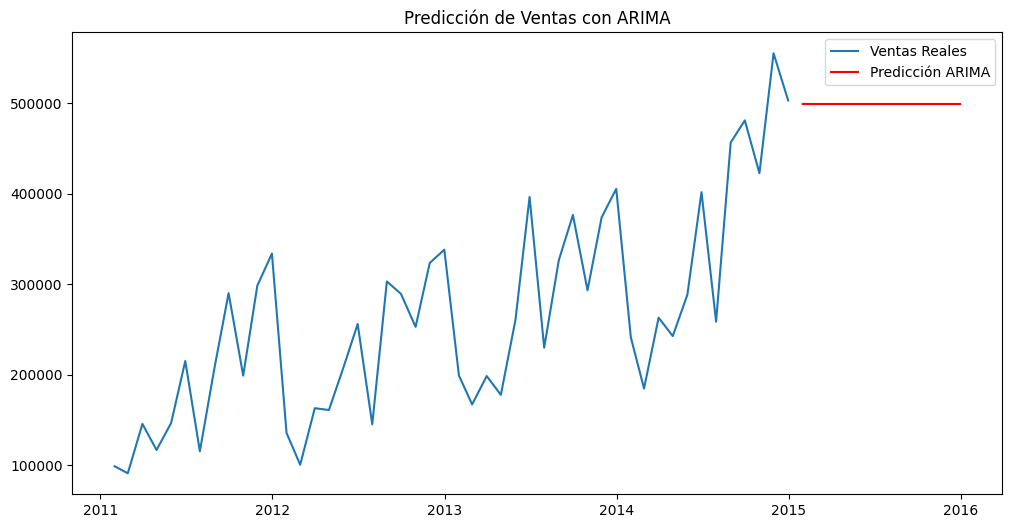

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Supongamos que 'df' es el DataFrame con tus datos
# Asegurarnos de que 'Order Date' esté en formato datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Agrupar por mes
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum()

# Graficar la serie temporal
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title("Ventas Mensuales")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.show()

# Graficar ACF y PACF para determinar los parámetros p, d, q
# Limitar los lags a 12 o menos, debido a la cantidad de datos disponible
plt.figure(figsize=(12, 6))
plot_acf(monthly_sales, lags=12)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(monthly_sales, lags=12)
plt.show()

# Ajustar un modelo ARIMA
# Suponiendo que hemos determinado p=1, d=1, q=1 a partir de ACF y PACF
model_arima = ARIMA(monthly_sales, order=(1, 1, 1))
model_arima_fit = model_arima.fit()

# Resumen del modelo ARIMA
print(model_arima_fit.summary())

# Hacer predicciones con el modelo ARIMA
forecast_arima = model_arima_fit.forecast(steps=12)  # Predicción de 12 meses

# Graficar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Ventas Reales')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=13, freq='M')[1:], forecast_arima, label='Predicción ARIMA', color='red')
plt.title("Predicción de Ventas con ARIMA")
plt.legend()
plt.show()



c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -418.942
Date:                            Thu, 14 Nov 2024   AIC                            847.884
Time:                                    19:16:20   BIC                            855.661
Sample:                                01-31-2011   HQIC                           850.569
                                     - 12-31-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7652      0.198      3.871      0.000       0.378       1.153
ma.L1         -0.9623      0.160   

C:\Users\Guillem\AppData\Local\Temp\ipykernel_17672\970119612.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_sales.index[-1], periods=13, freq='M')[1:], forecast_sarima, label='Predicción SARIMA', color='green')


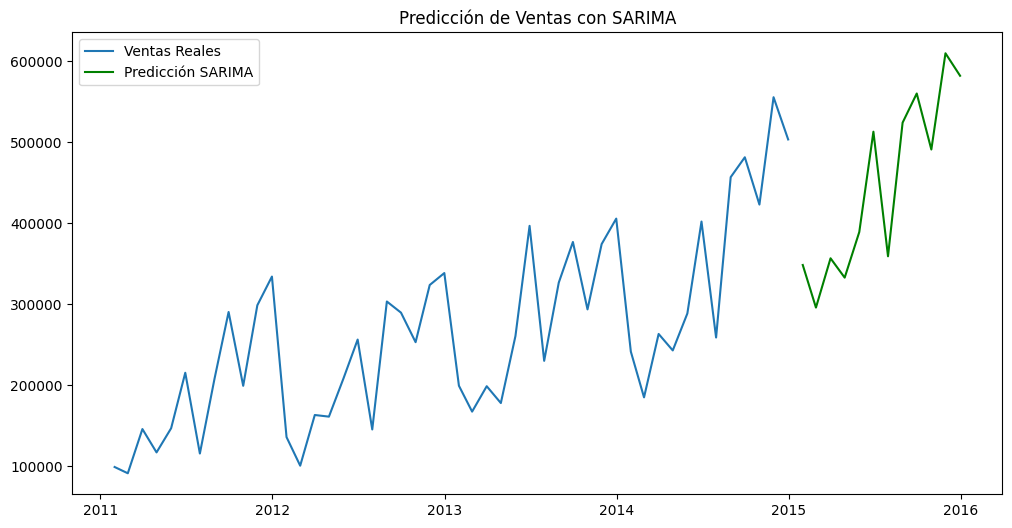

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar un modelo SARIMA
# Suponiendo que hemos determinado p=1, d=1, q=1 y el ciclo estacional s=12
model_sarima = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()

# Resumen del modelo SARIMA
print(model_sarima_fit.summary())

# Hacer predicciones con el modelo SARIMA
forecast_sarima = model_sarima_fit.forecast(steps=12)  # Predicción de 12 meses

# Graficar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Ventas Reales')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=13, freq='M')[1:], forecast_sarima, label='Predicción SARIMA', color='green')
plt.title("Predicción de Ventas con SARIMA")
plt.legend()
plt.show()


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluación del modelo ARIMA
rmse_arima = np.sqrt(mean_squared_error(monthly_sales[-12:], forecast_arima))
mae_arima = mean_absolute_error(monthly_sales[-12:], forecast_arima)
print(f"ARIMA - RMSE: {rmse_arima}, MAE: {mae_arima}")

# Evaluación del modelo SARIMA
rmse_sarima = np.sqrt(mean_squared_error(monthly_sales[-12:], forecast_sarima))
mae_sarima = mean_absolute_error(monthly_sales[-12:], forecast_sarima)
print(f"SARIMA - RMSE: {rmse_sarima}, MAE: {mae_sarima}")


ARIMA - RMSE: 184818.86107991563, MAE: 150909.4297473145
SARIMA - RMSE: 90095.99719963071, MAE: 88279.11993199175


In [48]:
from pmdarima import auto_arima
model_auto_arima = auto_arima(monthly_sales, seasonal=True, m=12, stepwise=True, trace=True)
print(model_auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=872.599, Time=1.23 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=872.144, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=873.916, Time=0.17 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=868.758, Time=0.48 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=909.441, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=871.924, Time=0.04 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=870.501, Time=0.15 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=868.292, Time=0.18 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=869.900, Time=0.60 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=869.405, Time=0.12 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=871.493, Time=0.28 sec
 ARIMA(0,0,2)(0,1,2)[12] intercept   : AIC=869.678, Time=0.21 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=869.675, Time=0.74 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=870.787, Time=0.74 sec
 ARIMA(0,0,1)(0,1,2)[12]         

In [49]:
import itertools

p = d = q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in seasonal_pdq:
    try:
        model_sarima = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=param)
        results = model_sarima.fit()
        print(f'SARIMA {param} - AIC: {results.aic}')
    except Exception as e:
        print(f'Error with {param}: {e}')


SARIMA (0, 0, 0, 12) - AIC: 1203.4295988606173
SARIMA (0, 0, 1, 12) - AIC: 1196.7009313366204


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (0, 0, 2, 12) - AIC: 1194.8736371833047
SARIMA (0, 1, 0, 12) - AIC: 852.1309712709364


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (0, 1, 1, 12) - AIC: 848.0466909672344


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (0, 1, 2, 12) - AIC: 846.460549328644
SARIMA (0, 2, 0, 12) - AIC: 582.7788786506376


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (0, 2, 1, 12) - AIC: 578.4741858071501


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (0, 2, 2, 12) - AIC: 578.9638229107103
SARIMA (1, 0, 0, 12) - AIC: 1192.1985844411126


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA (1, 0, 1, 12) - AIC: 1193.4307038969487


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (1, 0, 2, 12) - AIC: 1195.237943939138
SARIMA (1, 1, 0, 12) - AIC: 846.2807327878758


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (1, 1, 1, 12) - AIC: 847.8844183559813


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (1, 1, 2, 12) - AIC: 848.1320788051647
SARIMA (1, 2, 0, 12) - AIC: 580.8096347519574


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (1, 2, 1, 12) - AIC: 579.6158520804838


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (1, 2, 2, 12) - AIC: 580.9635428445291
SARIMA (2, 0, 0, 12) - AIC: 1193.2227562429841


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA (2, 0, 1, 12) - AIC: 1195.207258358265


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (2, 0, 2, 12) - AIC: 1197.2072465895787
SARIMA (2, 1, 0, 12) - AIC: 847.5810841830498


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (2, 1, 1, 12) - AIC: 848.6346819435369


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (2, 1, 2, 12) - AIC: 850.1252425201392


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (2, 2, 0, 12) - AIC: 578.618961271163


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (2, 2, 1, 12) - AIC: 580.4149771437142


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (2, 2, 2, 12) - AIC: 582.4142922950921


In [47]:
pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
    --------------------------------------- 10.2/625.1 kB ? eta -:--:--
   - ------------------------------------- 30.7/625.1 kB 435.7 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/625.1 kB 871.5 kB/s eta 0:00:01
   -------- ----------------------------- 143.4/625.1 kB 944.1 kB/s eta 0:00:01
   -------------- ------------------------- 225.3/625.1 kB 1.1 MB/s eta 0:00:01
   ------------------- -------------------- 307.2/625.1 kB 1.3 MB/s eta 0:00:01
   ------------------------ --------------- 389.1/625.1 kB 1.3 MB/s eta 0:00:01
   ---------------------------- ----------- 450.6/625.1 kB 1.3 MB/s eta 0:00:01
   --------------------------------- ------ 522.2/625.1 kB 1.4 MB/s eta 0:00:01
   ------------------------------------ --- 573.4/625.1 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  624.6/625.1 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 625.1/625.1 k


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import itertools

p = d = q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in seasonal_pdq:
    try:
        model_sarima = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=param)
        results = model_sarima.fit()
        print(f'SARIMA {param} - AIC: {results.aic}')
    except Exception as e:
        print(f'Error with {param}: {e}')


SARIMA (0, 0, 0, 12) - AIC: 1203.4295988606173


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA (0, 0, 1, 12) - AIC: 1196.7009313366204


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (0, 0, 2, 12) - AIC: 1194.8736371833047
SARIMA (0, 1, 0, 12) - AIC: 852.1309712709364


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (0, 1, 1, 12) - AIC: 848.0466909672344


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (0, 1, 2, 12) - AIC: 846.460549328644
SARIMA (0, 2, 0, 12) - AIC: 582.7788786506376


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (0, 2, 1, 12) - AIC: 578.4741858071501


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (0, 2, 2, 12) - AIC: 578.9638229107103
SARIMA (1, 0, 0, 12) - AIC: 1192.1985844411126


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA (1, 0, 1, 12) - AIC: 1193.4307038969487


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (1, 0, 2, 12) - AIC: 1195.237943939138
SARIMA (1, 1, 0, 12) - AIC: 846.2807327878758


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (1, 1, 1, 12) - AIC: 847.8844183559813


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (1, 1, 2, 12) - AIC: 848.1320788051647
SARIMA (1, 2, 0, 12) - AIC: 580.8096347519574


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (1, 2, 1, 12) - AIC: 579.6158520804838


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (1, 2, 2, 12) - AIC: 580.9635428445291
SARIMA (2, 0, 0, 12) - AIC: 1193.2227562429841


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMA (2, 0, 1, 12) - AIC: 1195.207258358265


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (2, 0, 2, 12) - AIC: 1197.2072465895787
SARIMA (2, 1, 0, 12) - AIC: 847.5810841830498


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (2, 1, 1, 12) - AIC: 848.6346819435369


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (2, 1, 2, 12) - AIC: 850.1252425201392


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (2, 2, 0, 12) - AIC: 578.618961271163


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (2, 2, 1, 12) - AIC: 580.4149771437142


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA (2, 2, 2, 12) - AIC: 582.4142922950921
